In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import tensorflow as tf

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [7]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [8]:
df=pd.read_csv('data.csv')

In [9]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [10]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [11]:
df.drop('Gender',inplace=True,axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.2+ MB


In [13]:
df['Claim'].value_counts()

0    49812
1      741
Name: Claim, dtype: int64

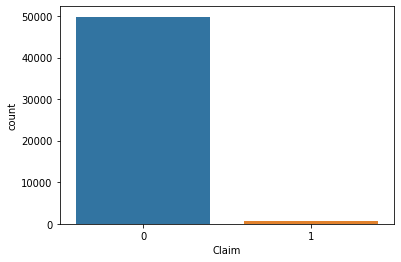

In [14]:
sns.countplot(data=df,x="Claim")
plt.show()

In [15]:
df_cat=df.select_dtypes(object)

In [16]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF"


In [17]:
df_num=df.select_dtypes(['float64','int64'])

In [18]:
df_num.head()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
0,3433,0,7,0.0,17.82,31
1,4339,0,85,69.0,0.00,36
2,34590,0,11,19.8,11.88,75
3,55816,0,16,20.0,0.00,32
4,13816,0,10,15.0,0.00,29


In [19]:
for col in  df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [20]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,6,1,1,16,56
1,7,1,1,10,79
2,6,1,1,16,56
3,7,1,1,1,38
4,7,1,1,10,47


In [21]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [22]:
df_new.head()

,ID,Claim,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,3433,0,7,0.0,17.82,31,6,1,1,16,56
1,4339,0,85,69.0,0.00,36,7,1,1,10,79
2,34590,0,11,19.8,11.88,75,6,1,1,16,56
3,55816,0,16,20.0,0.00,32,7,1,1,1,38
4,13816,0,10,15.0,0.00,29,7,1,1,10,47


In [23]:
X=df_new.drop('Claim',axis=1)
Y=df_new[['Claim']]

In [24]:
X.head()

,ID,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,3433,7,0.0,17.82,31,6,1,1,16,56
1,4339,85,69.0,0.00,36,7,1,1,10,79
2,34590,11,19.8,11.88,75,6,1,1,16,56
3,55816,16,20.0,0.00,32,7,1,1,1,38
4,13816,10,15.0,0.00,29,7,1,1,10,47


In [25]:
Y.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [27]:
ss=StandardScaler()

In [28]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [29]:
X.shape

(50553, 10)

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X.shape[1],),activation="sigmoid")
])

In [31]:
model.compile(optimizer='adam',loss="binary_crossentropy")

In [32]:
ros=RandomOverSampler()
X_sample2,Y_sample2=ros.fit_sample(X_train_ss,Y_train)

In [33]:
train_model=model.fit(X_sample2,Y_sample2,epochs=10,batch_size=50)

Epoch 1/10
1395/1395 [==============================] - 1s 987us/step - loss: 0.6843
Epoch 2/10
1395/1395 [==============================] - 1s 922us/step - loss: 0.5472
Epoch 3/10
1395/1395 [==============================] - 1s 933us/step - loss: 0.5423
Epoch 4/10
1395/1395 [==============================] - 1s 971us/step - loss: 0.5413
Epoch 5/10
1395/1395 [==============================] - 1s 1ms/step - loss: 0.5409
Epoch 6/10
1395/1395 [==============================] - 1s 1ms/step - loss: 0.5409
Epoch 7/10
1395/1395 [==============================] - 1s 950us/step - loss: 0.5409
Epoch 8/10
1395/1395 [==============================] - 1s 1ms/step - loss: 0.5409
Epoch 9/10
1395/1395 [==============================] - 1s 981us/step - loss: 0.5409
Epoch 10/10
1395/1395 [==============================] - 1s 924us/step - loss: 0.5408


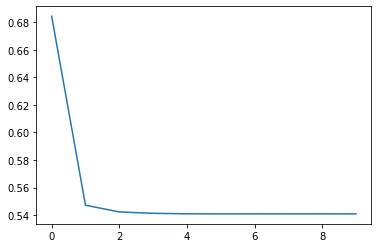

In [34]:
plt.plot(train_model.history['loss'])

In [35]:
Y_pred=model.predict(X_test_ss)

In [36]:
Y_pred=np.where(Y_pred >= 0.5,1,0)

In [37]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14961
           1       0.05      0.63      0.09       205

    accuracy                           0.82     15166
   macro avg       0.52      0.73      0.50     15166
weighted avg       0.98      0.82      0.89     15166

